<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch4_representing_data_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 di

## 4.1 범주형 변수

In [2]:
# 특성 공학 - 가장 적합한 데이터 표현을 찾는 것

## 4.1.1 원-핫-인코딩(가변수)

In [3]:
# 가변수 - 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꿈

import os
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header = None, index_col = False,
    names = ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
# value_counts 범주형 데이터 확인하기 (열마다 해줘야함)
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
# get_dummies로 범주형 데이터 변환해주기
print("원본특성 :\n", list(data.columns), "\n")

data_dummies = pd.get_dummies(data)
print("변환한 데이터 :\n", list(data_dummies.columns))

원본특성 :
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

변환한 데이터 :
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-ser

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# 데이터로 부터 target을 분리(**중요**)
features = data_dummies.loc[:, 'age' : 'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg = LogisticRegression(max_iter = 5000)
logreg.fit(X_train, y_train)
print("test score : {:.2f}" .format(logreg.score(X_test, y_test)))

test score : 0.81


## 4.1.2 숫자로 표현된 범주형 특성

In [11]:
demo_df = pd.DataFrame({'숫자 특성' : [0, 1, 2, 1],
                       '범주형 특성' : ['나', '너', '나', '그']})
demo_df

,숫자 특성,범주형 특성
0,0,나
1,1,너
2,2,나
3,1,그


In [12]:
# get_dummies는 문자열만 범주형 변수로 간주함
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_그,범주형 특성_나,범주형 특성_너
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [15]:
# 숫자형 변수를 가변수로 만들기 위해서는
# 1. 인코딩할 열을 명시

pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성'])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_그,범주형 특성_나,범주형 특성_너
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [16]:
# 2. 숫자를 문자열로 변환

demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
pd.get_dummies(demo_df)

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_그,범주형 특성_나,범주형 특성_너
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 OneHotEncoder와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기

In [18]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder는 모든 열에 인코딩을 수행
ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [20]:
# 원본 범주형 변수 이름 확인
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_그' '범주형 특성_나' '범주형 특성_너']


In [21]:
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [26]:
# ColumnTransformer - 열마다 다른 변환을 적용

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [
        ("scaling", StandardScaler(), ['age', 'hours-per-week']),
        ("onehot", OneHotEncoder(sparse = False), ['workclass', 'education', 'gender', 'occupation'])
    ]
)

In [28]:
# 선형회귀 모델에 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
print(X_train_trans.shape)

(24420, 44)


In [29]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_trans, y_train)

print("test score : {:.2f}" .format(logreg.score(X_test_trans, y_test)))

test score : 0.81


In [31]:
# named_transformers_ ColumnTranformer 안의 단계에 접근

ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

## 4.3 make_column_transformer로 간편하게 ColumnTransformer 만들기

In [32]:
# 자동으로 이름 지정
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    [
        (StandardScaler(), ['age', 'hours-per-week']),
        (OneHotEncoder(sparse = False), ['workclass', 'education', 'gender', 'occupation'])
    ]
)

## 4.4 구간 분할, 이산화 그리고 선형 모델, 트리 모델

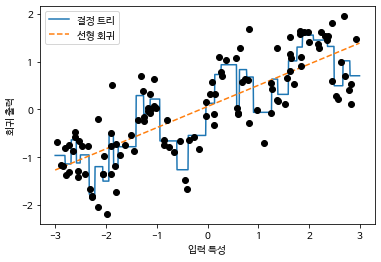

In [33]:
# 어떤 모델을 사용하는 지에 따라서도 데이터의 표현 방법이 달라짐

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label = "선형 회귀")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [34]:
# 각 모델에 구간 분할(bining) 적용해보기

from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform').fit(X)
print("bin edges : \n", kb.bin_edges_)

bin edges : 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [36]:
X_binned = kb.transform(X)
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

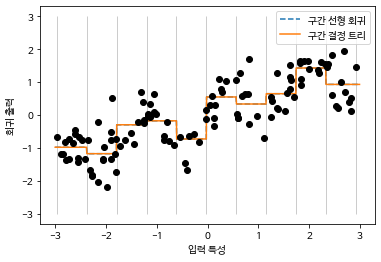

In [39]:
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label = "구간 선형 회귀")

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = "구간 결정 트리")

plt.plot(X[:, 0], y, 'o', c = 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

## 4.5 상호작용과 다항식